# Traitement des données

## 1.Importation des bibliothèques

In [1]:
import scipy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras import layers, models
import tensorflow as tf
import seaborn as sns

## 2. Importation du fichier de données.

In [2]:
dataset = pd.read_csv('data.csv')
dataset.head()

,num_ligne,ID_Client,Nom,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Au vu des premiers éléments de notre fichier, nous constatons que certaines variables du jeu de données sont numériques
et d'autres sont catégorielles.

In [3]:
print(dataset.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   num_ligne       10000 non-null  int64  
 1   ID_Client       10000 non-null  int64  
 2   Nom             10000 non-null  object 
 3   Score_Credit    10000 non-null  int64  
 4   Pays            10000 non-null  object 
 5   Sex             10000 non-null  object 
 6   Age             10000 non-null  int64  
 7   Tenure          10000 non-null  int64  
 8   Balance         10000 non-null  float64
 9   Num_Produit     10000 non-null  int64  
 10  il_a_CrCard     10000 non-null  int64  
 11  Membre_actif    10000 non-null  int64  
 12  Salaire_estime  10000 non-null  float64
 13  Exited          10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [4]:
dataset.isnull().sum()

num_ligne         0
ID_Client         0
Nom               0
Score_Credit      0
Pays              0
Sex               0
Age               0
Tenure            0
Balance           0
Num_Produit       0
il_a_CrCard       0
Membre_actif      0
Salaire_estime    0
Exited            0
dtype: int64

Notre fichier ne comporte pas de valeurs manquantes.

## 3. traitement des variables catégorielles

In [5]:
categorical = [var for var in dataset.columns if dataset[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 3 categorical variables

The categorical variables are : ['Nom', 'Pays', 'Sex']


Notre jeu de données comporte 3 variables qualitatives qu'il va falloir encoder avant de procéder à
toute modélisation.

### Encodage des variables catégorielles 'Nom', 'Pays', 'Sex'

**Encodage de la variable 'Nom'**

In [6]:
lab = LabelEncoder()
dataset["Pays"] = lab.fit_transform(dataset["Pays"])
dataset["Pays"]


0       0
1       2
2       0
3       0
4       2
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: Pays, Length: 10000, dtype: int32

**Encodage de la variable 'Nom'**

In [7]:
lab = LabelEncoder()
dataset["Nom"] = lab.fit_transform(dataset["Nom"])
dataset["Nom"].head()

0    1115
1    1177
2    2040
3     289
4    1822
Name: Nom, dtype: int32

**Encodage de la variable 'Sex'**

In [8]:
lab = LabelEncoder()
dataset["Sex"] = lab.fit_transform(dataset["Sex"])
dataset["Sex"]


0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Sex, Length: 10000, dtype: int32

In [9]:

dataset.head()



,num_ligne,ID_Client,Nom,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [10]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   num_ligne       10000 non-null  int64  
 1   ID_Client       10000 non-null  int64  
 2   Nom             10000 non-null  int32  
 3   Score_Credit    10000 non-null  int64  
 4   Pays            10000 non-null  int32  
 5   Sex             10000 non-null  int32  
 6   Age             10000 non-null  int64  
 7   Tenure          10000 non-null  int64  
 8   Balance         10000 non-null  float64
 9   Num_Produit     10000 non-null  int64  
 10  il_a_CrCard     10000 non-null  int64  
 11  Membre_actif    10000 non-null  int64  
 12  Salaire_estime  10000 non-null  float64
 13  Exited          10000 non-null  int64  
dtypes: float64(2), int32(3), int64(9)
memory usage: 976.7 KB


## 4. Définition de nos variables: Notre variable target (Y) est la variable 'Exited' en fonction des autres variables.On va récuprer X et Y à partir du jeu de données

In [11]:
X = dataset.drop([], axis=1)
X = dataset.drop(["Exited", "num_ligne", "ID_Client", "Nom"], axis=1)

y = dataset['Exited']
y = dataset['Exited'].values.reshape(-1,1)


print(X.shape)
print(y.shape)


(10000, 10)
(10000, 1)


## 5.Fractionnement le jeu de données en jeu d'entraînement et jeu de test (20% pour le test)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(8000, 10)
(2000, 10)


Notre jeu de données comporte une grande disparité de valeurs. On va donc les standardiser.
La standardisation, qui signifie "centrer réduire", désigne la conversion des données vers un format standard 
commun et normalisé.

L’objectif de la standardisation est de rendre les données lisibles par l’ordinateur ou de les structurer de 
sorte qu’un collaborateur puisse les lire et les comprendre. Une fois acquises, les différentes données doivent 
être standardisées afin d’être exploitées et étudiées uniformément.



## 6.Standariser le jeu d'entrainement et de test à l'aide de StandardScaler

In [13]:
cols = X_train.columns

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_test

array([[-0.55204276,  0.3131264 , -1.09168714, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [-1.31490297, -0.89294542, -1.09168714, ...,  0.64259497,
        -1.03227043,  0.49587037],
       [ 0.57162971,  1.51919821, -1.09168714, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-0.74791227,  1.51919821,  0.91601335, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [-0.00566991,  0.3131264 ,  0.91601335, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [-0.79945688,  0.3131264 ,  0.91601335, ...,  0.64259497,
        -1.03227043,  1.61255917]])

In [15]:
X_train = pd.DataFrame(X_train, columns=[cols])

X_test = pd.DataFrame(X_test, columns=[cols])

X_train

,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime
0,0.169582,1.519198,-1.091687,-0.464608,0.006661,-1.215717,0.809503,0.642595,-1.032270,1.106432
1,-2.304559,0.313126,0.916013,0.301026,-1.377440,-0.006312,-0.921591,0.642595,0.968738,-0.748664
2,-1.191196,-0.892945,-1.091687,-0.943129,-1.031415,0.579935,-0.921591,0.642595,-1.032270,1.485335
3,0.035566,1.519198,0.916013,0.109617,0.006661,0.473128,-0.921591,0.642595,-1.032270,1.276528
4,2.056114,1.519198,-1.091687,1.736588,1.044737,0.810193,0.809503,0.642595,0.968738,0.558378
...,...,...,...,...,...,...,...,...,...,...
7995,-0.582970,0.313126,-1.091687,-0.656016,-0.339364,0.703104,0.809503,0.642595,0.968738,1.091330
7996,1.478815,1.519198,-1.091687,-1.613058,-0.339364,0.613060,-0.921591,0.642595,0.968738,0.131760
7997,0.901515,-0.892945,0.916013,-0.368904,0.006661,1.361474,0.809503,0.642595,-1.032270,1.412320
7998,-0.624205,1.519198,-1.091687,-0.081791,1.390762,-1.215717,0.809503,0.642595,0.968738,0.844321


Nous n'avons pas de corrélation significatives entre nos variables.

## 7.Création du modèle de régression logistique et entraînement sur les données d'entraînement

L'objectif de notre étude est de savoir si les clients souhaitant se désabonner sont bien classés ou non. 
On va commencer notre modélisation par une régression logistique trés utilisé pour les modèles de classification.

In [16]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)

print(y_train.shape)
# fit the model
logreg.fit(X_train, y_train)

(8000, 1)


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0, solver='liblinear')

## Prediction des résultats du modèle sur l'ensemble du test

In [17]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Comparaison de l'accuracy du modèle sur l'ensemble d'apprentissage et l'ensemble de test

In [18]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8086
Test set score: 0.8070


L'accuracy entre nos données d'apprentissage et nos données de jeu de test sont quasi identiques, ce qui 
signifie que notre modèle a été bien entrainé.

## Affichage de la matrice de confusion, TP, TN, FP, FN sur le jeu du test en utilisant la fonction confusion_matrix

In [19]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1542   53]
 [ 333   72]]

True Positives(TP) =  1542

True Negatives(TN) =  72

False Positives(FP) =  53

False Negatives(FN) =  333


## On Calcule les métriques de classification (accuracy, classification error, precision, recall, specificity) en utilisant seulement les valeurs de TP, TN, FP, FN.

In [20]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))



# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))



# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

# print recall score

recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

# print Specificity score

specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.8070
Classification error : 0.1930
Precision : 0.9668
Recall or Sensitivity : 0.8224
Specificity : 0.5760


Nous allons procéder à une réduction de la dimensionnalité de notre jeu de données pour savoir si l'on peut
obtenir de meilleurs résultats. On vaeffectuer une modélisation de régression logistique avec PCA. 

# 8. Création du modèle de régression logistique avec PCA

In [21]:
# Modèle avec une régression logistique avec PCA
pca_log = PCA(n_components=2)
X_train_pca = pca_log.fit_transform(X_train)

logreg.fit(X_train_pca, y_train)

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0, solver='liblinear')

In [22]:
X_test_pca = pca_log.transform(X_test)

# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train_pca, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test_pca, y_test)))




Training set score: 0.7959
Test set score: 0.7975


On obtient des résultats un peu moins bons que la modélisation sans PCA. Cela peut être dû à une perte
d'informations liée à la réduction de la dimensionnalité. 

Peut-on obtenir de meilleurs résultats en utilisant la méthode de forêt 
d'arbres décisionnels (méthode Random Forest).C’est une technique facile à interpréter, stable, qui présente
en général de bonnes accuracies et qui peut être utilisée pour des tâches de régression ou de classification. 
Elle couvre donc une grande partie des problèmes de Machine Learning.



# 9. Création du modèle de forêt d'arbres décisionnels (Méthode Random Forest)

In [23]:
# Modèle Random Tree Forest
forest_reg = RandomForestClassifier(random_state=42)
forest_reg.fit(X_train, y_train)

<ipython-input-23-284f48e5137a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [24]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(forest_reg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(forest_reg.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.8640


On obtient une meilleure performance du modèle avec la methode Random Forest. Mais le résultat parfait du score 
pour les données d'apprentissage peut révéler un problème de surapprentissage.
On va utiliser la méthode du RandomForest avec Pca pour voir quels sont les résultats.

# 10. Création du modèle de forêt d'arbres décisionnels (Méthode Random Forest) avec PCA (réduction de dimensionnalité)

In [25]:
# Modèle Random Tree Forest avec PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

forest_reg.fit(X_train_pca, y_train)

<ipython-input-25-fdc61aa54bd0>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(X_train_pca, y_train)


RandomForestClassifier(random_state=42)

In [26]:
X_test_pca = pca.transform(X_test)

# print the scores on training and test set

print('Training set score: {:.4f}'.format(forest_reg.score(X_train_pca, y_train)))

print('Test set score: {:.4f}'.format(forest_reg.score(X_test_pca, y_test)))


Training set score: 0.9999
Test set score: 0.7715


# 11. Modélisation par réseaux de neurones.

In [31]:

#Construction du modèle
model = models.Sequential()
# Définition de l'entrée et de la couche cachée
model.add(layers.Dense(10, kernel_initializer = "uniform", activation='relu', input_shape=(10,)))
model.add(layers.Dense(20, kernel_initializer = "uniform", activation='relu'))
# Construction de la couche de sortie
model.add(layers.Dense(1, kernel_initializer = "uniform",  activation='sigmoid'))

In [32]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


Après avoir construit le réseau neuronal, on doit compiler le modèle en ajoutant quelques paramètres qui 
indiqueront au réseau neuronal comment démarrer le processus d'entraînement. Tout d'abord, on ajoute 
l'optimiseur qui créera ou, en d'autres termes, mettra à jour le paramètre du réseau neuronal pour l'adapter 
à nos données.

Puis on indique la fonction de perte qui vous indiquera les performances de votre modèle.

Enfin, les métriques qui donnent des tests indicatifs de la qualité du modèle.


In [33]:
#compilation du modèle
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

On va entraîner notre modèle, on utilise la fonction fit avec les données d'apprentissage et combien d'époques 
doivent être exécutées ou (commbien de fois on parcours le jeu de données), combien de fois doivent faire une 
estimation.

In [34]:
history = model.fit(X_train, y_train, batch_size=10, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
800/800 [==============================] - 2s 2ms/step - loss: 0.5335 - accuracy: 0.7986 - val_loss: 0.4296 - val_accuracy: 0.7975
Epoch 2/10
800/800 [==============================] - 1s 1ms/step - loss: 0.4222 - accuracy: 0.8015 - val_loss: 0.4183 - val_accuracy: 0.8285
Epoch 3/10
800/800 [==============================] - 1s 2ms/step - loss: 0.4121 - accuracy: 0.8314 - val_loss: 0.4102 - val_accuracy: 0.8330
Epoch 4/10
800/800 [==============================] - 1s 1ms/step - loss: 0.4121 - accuracy: 0.8300 - val_loss: 0.4040 - val_accuracy: 0.8385
Epoch 5/10
800/800 [==============================] - 1s 1ms/step - loss: 0.4000 - accuracy: 0.8349 - val_loss: 0.3991 - val_accuracy: 0.8390
Epoch 6/10
800/800 [==============================] - 1s 1ms/step - loss: 0.4020 - accuracy: 0.8329 - val_loss: 0.3958 - val_accuracy: 0.8400
Epoch 7/10
800/800 [==============================] - 1s 1ms/step - loss: 0.3977 - accuracy: 0.8377 - val_loss: 0.3952 - val_accuracy: 0.8375
Epoch 

In [35]:
# Evaluation des performances du modèle
test_loss, test_acc = model.evaluate(X_test, y_test)
# on imprime la performance du modèle
print('\nTest accuracy:', test_acc)

63/63 [==============================] - 0s 2ms/step - loss: 0.3970 - accuracy: 0.8420

Test accuracy: 0.8420000076293945


**prédictions sur le jeu de test**

In [36]:
pred = model.predict(X_test)
pred = (pred > 0.50)

In [37]:
conf = confusion_matrix(y_test, pred)

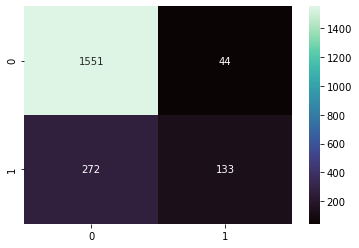

In [38]:
sns.heatmap(conf, cmap='mako', annot=True, fmt='d')

Le modèle de réseaux de neurones classe plutôt bien les abonnés ne souhaitant pas de désinscrire (1551) contre
133 pour ceux souhaitant se désinscrire.

### Conclusion:
Au vue des différentes modélisations, il semblerait que le modèle de forêt d'arbres décisionnels
sans Pca soit le plus performant avec un score de 0.86 pour le jeu de test. Que ce soit pour la 
régression logistique ou la méthode Random Forest, le Pca nous fournit de moins bons résultats, ce qui
peut être lié à une perte d'informations due à la réduction de dimensionnalité.

Le réseau de neurones nous donne des résultats aléatoires. Nous obtenons une erreur du modèle de neurones à 0.39
contre 0.19 pour le modèle de régression logistique.